# Script for analysing NO3-N data
Concentrations for NO3-N are obtained by multiplying the NO3 concentrations by the stoichiometric ratio (0.226) and rounding off to 3 decimal places.  

In [2]:
# import the necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import geopandas as gpd
import pickle
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import zscore
from scipy.stats import probplot
import statsmodels.api as sm
import random
import warnings

## Load data

In [3]:
dataframes_list = None
with open("NO3_N_dfs", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    NO3_N_dfs = pickle.load(file)

In [4]:
NO3_N_dfs[0].dtypes

NO3-N [mg/l]        float64
year                  int64
month                 int64
date                 object
year_month        period[M]
easting             float64
northing            float64
station_name         object
station_number       object
water_body           object
dtype: object

In [5]:
concentrations = [df.iloc[j,0] for df in NO3_N_dfs for j in range(df.shape[0])]
print('Total number of data points = ', len(concentrations))
concentrations

Total number of data points =  72364


[1.311,
 1.107,
 0.972,
 1.198,
 1.198,
 0.972,
 1.198,
 1.107,
 1.107,
 1.198,
 1.401,
 1.379,
 1.107,
 0.904,
 0.994,
 0.994,
 1.153,
 1.243,
 0.972,
 1.017,
 1.401,
 1.356,
 5.424,
 6.328,
 4.294,
 3.164,
 2.486,
 3.164,
 2.102,
 2.712,
 3.842,
 3.164,
 4.294,
 5.831,
 6.373,
 5.944,
 5.966,
 5.65,
 5.198,
 4.972,
 4.52,
 4.294,
 5.424,
 4.068,
 5.424,
 6.328,
 6.328,
 6.328,
 5.65,
 5.198,
 4.972,
 4.972,
 3.616,
 3.616,
 3.842,
 3.842,
 4.52,
 4.294,
 6.328,
 6.78,
 6.328,
 5.65,
 5.198,
 4.972,
 4.52,
 4.52,
 4.068,
 4.746,
 5.198,
 5.65,
 2.102,
 2.102,
 2.102,
 2.011,
 1.876,
 1.582,
 1.085,
 1.401,
 1.469,
 1.514,
 1.853,
 1.672,
 2.034,
 2.486,
 1.876,
 2.057,
 1.944,
 1.537,
 1.356,
 1.243,
 1.989,
 1.107,
 1.446,
 2.011,
 4.294,
 4.52,
 3.164,
 3.39,
 2.192,
 3.616,
 1.311,
 2.938,
 3.39,
 2.486,
 3.39,
 3.842,
 6.102,
 4.294,
 4.972,
 4.294,
 3.39,
 2.712,
 2.192,
 2.712,
 2.079,
 2.712,
 3.616,
 4.068,
 3.616,
 4.294,
 4.294,
 3.39,
 3.164,
 2.938,
 2.486,
 3.39,
 3.616,


## Box-Cox Power Transformation

In [6]:
# combine all the dataframes in one dataframe

combined_df = pd.concat(NO3_N_dfs, axis=0)

In [7]:
combined_df

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body
0,1.311,2016,2,2016-02-01,2016-02,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen
1,1.107,2016,3,2016-03-08,2016-03,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen
2,0.972,2016,4,2016-04-05,2016-04,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen
3,1.198,2016,5,2016-05-03,2016-05,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen
4,1.198,2016,6,2016-06-01,2016-06,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen
...,...,...,...,...,...,...,...,...,...,...
452,0.588,2021,8,2021-08-25,2021-08,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech
453,0.746,2021,9,2021-09-28,2021-09,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech
454,0.949,2021,10,2021-10-20,2021-10,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech
455,0.994,2021,11,2021-11-22,2021-11,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech


In [8]:
skewness_original = skew(combined_df.iloc[:,0])
transformed_data, lambda_value = boxcox(combined_df.iloc[:,0])
skewness_boxcox = skew(transformed_data)
combined_df["NO3-N [mg/l] BC"] = transformed_data

In [9]:
with open('lambda_boxcox', 'wb') as file:
        pickle.dump(lambda_value, file)

In [10]:
combined_df

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body,NO3-N [mg/l] BC
0,1.311,2016,2,2016-02-01,2016-02,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.285982
1,1.107,2016,3,2016-03-08,2016-03,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.103746
2,0.972,2016,4,2016-04-05,2016-04,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,-0.028239
3,1.198,2016,5,2016-05-03,2016-05,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
4,1.198,2016,6,2016-06-01,2016-06,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
...,...,...,...,...,...,...,...,...,...,...,...
452,0.588,2021,8,2021-08-25,2021-08,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.478476
453,0.746,2021,9,2021-09-28,2021-09,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.276526
454,0.949,2021,10,2021-10-20,2021-10,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.051803
455,0.994,2021,11,2021-11-22,2021-11,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.006011


In [11]:
combined_copy = combined_df.copy()
z_scores = zscore(combined_copy["NO3-N [mg/l] BC"])

# Define the non-rejection zone threshold at alpha level 0.05
threshold = 1.96  # For a two-tailed test

# Filter rows within the non-rejection zone
combined_df_filtered = combined_copy[(z_scores > -threshold) & (z_scores < threshold)]

In [12]:
pd.set_option('display.max_rows', 1000)
combined_df_filtered

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body,NO3-N [mg/l] BC
0,1.311,2016,2,2016-02-01,2016-02,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.285982
1,1.107,2016,3,2016-03-08,2016-03,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.103746
2,0.972,2016,4,2016-04-05,2016-04,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,-0.028239
3,1.198,2016,5,2016-05-03,2016-05,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
4,1.198,2016,6,2016-06-01,2016-06,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
...,...,...,...,...,...,...,...,...,...,...,...
452,0.588,2021,8,2021-08-25,2021-08,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.478476
453,0.746,2021,9,2021-09-28,2021-09,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.276526
454,0.949,2021,10,2021-10-20,2021-10,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.051803
455,0.994,2021,11,2021-11-22,2021-11,643380.0,5356423.0,Augsburg Hochablaß,3044,Lech,-0.006011


In [67]:
combined_df[combined_df.loc[:,'NO3-N [mg/l]']>8.8]

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body,NO3-N [mg/l] BC
0,9.944,2014,1,2014-01-29,2014-01,635961.0,5491170.0,Strbr. Herzogenaurach-Burgstall,17828,Schleifmühlbach,3.763362
1,12.430,2014,2,2014-02-26,2014-02,635961.0,5491170.0,Strbr. Herzogenaurach-Burgstall,17828,Schleifmühlbach,4.347693
2,12.430,2014,3,2014-03-26,2014-03,635961.0,5491170.0,Strbr. Herzogenaurach-Burgstall,17828,Schleifmühlbach,4.347693
3,12.430,2014,4,2014-04-23,2014-04,635961.0,5491170.0,Strbr. Herzogenaurach-Burgstall,17828,Schleifmühlbach,4.347693
4,11.300,2014,5,2014-05-20,2014-05,635961.0,5491170.0,Strbr. Herzogenaurach-Burgstall,17828,Schleifmühlbach,4.091724
...,...,...,...,...,...,...,...,...,...,...,...
14,11.300,2018,2,2018-02-27,2018-02,746150.0,5469769.0,800m uh. Wenigrötz,105645,Rötzerbach,4.091724
15,9.266,2018,3,2018-03-19,2018-03,746150.0,5469769.0,800m uh. Wenigrötz,105645,Rötzerbach,3.589033
27,11.752,2021,2,2021-02-17,2021-02,746150.0,5469769.0,800m uh. Wenigrötz,105645,Rötzerbach,4.195878
28,9.492,2021,3,2021-03-22,2021-03,746150.0,5469769.0,800m uh. Wenigrötz,105645,Rötzerbach,3.647969


In [112]:
dataframes_by_value = []

# Group by the unique values in the specified column
for unique_value, group_df in test_df.groupby('station_number'):
    # Create a new dataframe for each unique value
    dataframes_by_value.append(group_df)

In [113]:
station_numbers = []
for i, df in enumerate(dataframes_by_value):
    df = df.reset_index(drop=True)
    station_numbers.append(df.loc[0,'station_number'])

In [114]:
station_numbers

['10190',
 '102007',
 '102027',
 '102033',
 '102035',
 '102846',
 '103111',
 '103119',
 '103121',
 '103148',
 '103245',
 '103256',
 '103258',
 '103286',
 '103300',
 '103332',
 '103391',
 '103406',
 '103410',
 '103430',
 '103881',
 '104132',
 '10428',
 '105426',
 '105434',
 '105438',
 '105440',
 '105442',
 '10546',
 '105472',
 '105478',
 '10551',
 '10553',
 '105588',
 '105632',
 '105645',
 '105743',
 '10652',
 '106726',
 '11132',
 '111606',
 '111621',
 '111624',
 '111659',
 '111662',
 '11229',
 '11307',
 '113506',
 '11423',
 '114236',
 '11431',
 '11434',
 '11437',
 '11524',
 '11584',
 '11609',
 '11636',
 '11698',
 '11700',
 '125619',
 '12614',
 '12615',
 '128652',
 '128654',
 '128971',
 '12988',
 '12995',
 '130178',
 '13027',
 '13104',
 '131595',
 '13234',
 '132572',
 '136336',
 '136338',
 '136340',
 '136342',
 '139744',
 '14272',
 '143079',
 '143163',
 '15402',
 '15540',
 '15753',
 '15943',
 '16122',
 '16532',
 '16587',
 '16687',
 '16702',
 '16930',
 '16951',
 '17120',
 '17661',
 '1766

In [125]:
len(station_numbers)

199

In [121]:
dfs_to_test = []
for i, df in enumerate(NO3_N_dfs):
    if df.loc[0,'station_number'] in station_numbers:
        print(i, df.loc[0,'station_number'])
        dfs_to_test.append(df)


6 17828
7 20496
10 23994
17 102027
18 102846
38 3630
43 5949
57 16687
59 20256
60 20449
71 106726
74 114236
80 2927
98 17766
101 19961
106 105743
120 143079
121 176647
127 2413
128 2926
135 4172
144 4029
169 3807
178 22545
184 96810
191 103111
193 103256
201 105440
221 10428
236 18318
242 21749
250 96508
272 3357
284 11229
295 125619
304 3148
309 11700
312 16122
318 17984
321 19463
322 19526
324 24026
326 103391
327 105478
329 113506
333 96506
334 96722
335 196284
342 10551
345 10553
347 11437
350 13027
353 19724
354 20185
360 21436
361 21558
362 22559
365 103430
376 2920
380 2929
381 3207
401 11584
407 13104
408 13234
412 16587
414 17783
415 18423
418 20582
420 103148
421 105472
426 130178
431 3754
432 7469
440 11434
446 16951
447 17120
452 21712
453 21845
454 22142
458 95819
464 139744
471 3352
474 10546
480 11132
481 11431
488 16532
489 16930
491 18792
496 95796
497 102035
498 103258
502 105588
504 105632
513 176735
515 2840
520 3278
521 3306
524 4028
526 11636
528 11698
532 12988
5

In [124]:
len(dfs_to_test)

199

In [122]:
avg_dfs = []
for i, df in enumerate(dataframes_by_value):
    monthly_avg_df = df.groupby('month', as_index=False).agg({
        'NO3-N [mg/l]': 'mean',
        'NO3-N [mg/l] BC': 'mean',
        'easting': 'first',  # Assuming the same for all entries
        'northing': 'first',  # Assuming the same for all entries
        'station_name': 'first',  # Assuming the same for all entries
        'station_number': 'first',  # Assuming the same for all entries
        'water_body': 'first'  # Assuming the same for all entries
    })
    avg_dfs.append(monthly_avg_df)

In [156]:
avg_dfs[196]

,month,NO3-N [mg/l],NO3-N [mg/l] BC,easting,northing,station_name,station_number,water_body
0,1,9.492,3.646295,737473.0,5474434.0,uh. Oberauerbach,96810,Auerbach
1,2,9.944,3.753612,737473.0,5474434.0,uh. Oberauerbach,96810,Auerbach
2,3,10.848,3.985038,737473.0,5474434.0,uh. Oberauerbach,96810,Auerbach
3,4,9.718,3.706068,737473.0,5474434.0,uh. Oberauerbach,96810,Auerbach
4,11,10.848,3.985038,737473.0,5474434.0,uh. Oberauerbach,96810,Auerbach
5,12,13.108,4.494613,737473.0,5474434.0,uh. Oberauerbach,96810,Auerbach


In [157]:
lens = 0
for df in avg_dfs:
    if df.shape[0] == 12:
        lens = lens +1 

In [158]:
lens

21

In [159]:
len(NO3_N_dfs)

977

In [160]:
len(NO3_N_dfs_filtered)

944

In [13]:
skewness_og_bcsubset = skew(combined_df_filtered.iloc[:,0])
skewness_transformed_bc_subset = skew(combined_df_filtered.iloc[:,10])

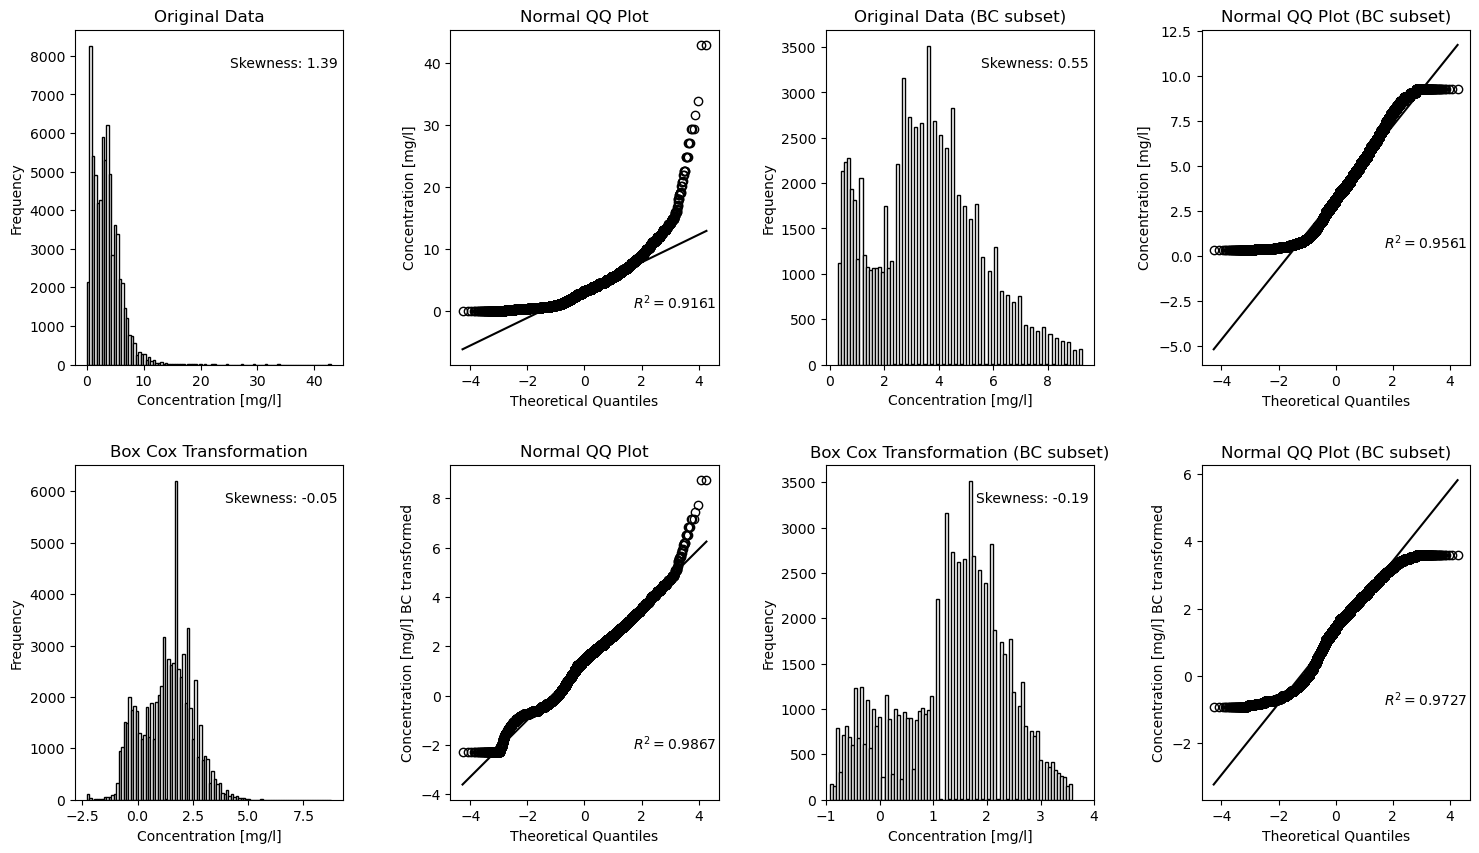

In [14]:
# Plot 
plt.figure(figsize=(18, 10))
 # You can adjust this value to increase or decrease vertical space

plt.subplot(2, 4, 1)
plt.hist(combined_df["NO3-N [mg/l]"], bins=100, edgecolor='black', color= 'white')
plt.text(0.98, 0.9, f'Skewness: {skewness_original:.2f}', transform=plt.gca().transAxes, ha='right', va='center')
plt.title('Original Data')
plt.xlabel('Concentration [mg/l]')
plt.ylabel('Frequency')

plt.subplot(2,4,2)
ax = plt.gca()
probplot(combined_df["NO3-N [mg/l]"],plot=ax,fit=True, rvalue=True)
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_linestyle('None')
ax.get_lines()[1].set_color('black')
ax.set_title('Normal QQ Plot')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Concentration [mg/l]')

plt.subplot(2, 4, 3)
plt.hist(combined_df_filtered["NO3-N [mg/l]"], bins=80, edgecolor='black', color= 'white')
plt.text(0.98, 0.9, f'Skewness: {skewness_og_bcsubset:.2f}', transform=plt.gca().transAxes, ha='right', va='center')
plt.title('Original Data (BC subset)')
plt.xlabel('Concentration [mg/l]')
plt.ylabel('Frequency')

plt.subplot(2,4,4)
ax = plt.gca()
probplot(combined_df_filtered["NO3-N [mg/l]"],plot=ax, fit=True, rvalue=True)
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_linestyle('None')
ax.get_lines()[1].set_color('black')
ax.set_title('Normal QQ Plot (BC subset)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Concentration [mg/l]')

plt.subplot(2, 4, 5)
plt.hist(combined_df["NO3-N [mg/l] BC"], bins=100, edgecolor='black', color= 'white')
plt.text(0.98, 0.9, f'Skewness: {skewness_boxcox:.2f}', transform=plt.gca().transAxes, ha='right', va='center')
plt.title('Box Cox Transformation')
plt.xlabel('Concentration [mg/l]')
plt.ylabel('Frequency')

plt.subplot(2,4,6)
ax = plt.gca()
probplot(combined_df["NO3-N [mg/l] BC"], plot=ax, fit=True, rvalue=True)
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_linestyle('None')
ax.get_lines()[1].set_color('black')
ax.set_title('Normal QQ Plot')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Concentration [mg/l] BC transformed')

plt.subplot(2, 4, 7)
plt.hist(combined_df_filtered["NO3-N [mg/l] BC"], bins=80, edgecolor='black', color= 'white')
plt.text(0.98, 0.9, f'Skewness: {skewness_transformed_bc_subset:.2f}', transform=plt.gca().transAxes, ha='right', va='center')
plt.title('Box Cox Transformation (BC subset)')
plt.xlabel('Concentration [mg/l]')
plt.ylabel('Frequency')
plt.xlim(-1,4)

plt.subplot(2,4,8)
ax = plt.gca()
probplot(combined_df_filtered["NO3-N [mg/l] BC"], plot=ax, fit=True, rvalue=True)
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_linestyle('None')
ax.get_lines()[1].set_color('black')
ax.set_title('Normal QQ Plot (BC subset)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Concentration [mg/l] BC transformed')

plt.subplots_adjust(hspace=0.3, wspace = 0.4) 

#plt.tight_layout()
plt.savefig('box_cox_transformation_500dpi.jpg', format = 'jpg', bbox_inches = 'tight', dpi=300)
plt.show()

In [15]:
# convert the combined dataframe back to individial dataframes

NO3_N_dfs_filtered = []

# Group by 'station_name' and iterate over each group
for station, data in combined_df_filtered.groupby('station_name', sort = False ):
    # Append the DataFrame corresponding to each station to the list
    NO3_N_dfs_filtered.append(data)

In [16]:
NO3_N_dfs_filtered[0]

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body,NO3-N [mg/l] BC
0,1.311,2016,2,2016-02-01,2016-02,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.285982
1,1.107,2016,3,2016-03-08,2016-03,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.103746
2,0.972,2016,4,2016-04-05,2016-04,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,-0.028239
3,1.198,2016,5,2016-05-03,2016-05,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
4,1.198,2016,6,2016-06-01,2016-06,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
5,0.972,2016,6,2016-06-28,2016-06,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,-0.028239
6,1.198,2016,8,2016-08-23,2016-08,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333
7,1.107,2016,9,2016-09-20,2016-09,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.103746
8,1.107,2016,10,2016-10-18,2016-10,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.103746
9,1.198,2016,11,2016-11-08,2016-11,781370.0,5454272.0,Strbr. Kötzting,8518,Weißer Regen,0.187333


In [17]:
# Again check the number of stations after applying certain threholds 

thresh = 2
edited_dataframes_list = [df for i,df in enumerate(NO3_N_dfs_filtered) if len(df.iloc[:,1].unique()) > thresh]
print("Number of stations after applying minimum years threshold = ", len(edited_dataframes_list))

# extract only those stations which have all 12 months for all available years

new_list = [df for i, df in enumerate(edited_dataframes_list) if all(len(df[df.iloc[:, 1] == year].iloc[:, 2].unique()) == 12 for year in df.iloc[:, 1].unique())]

print("Number of stations that have minimum 3 years of data for all the months = ", len(new_list))

Number of stations after applying minimum years threshold =  500
Number of stations that have minimum 3 years of data for all the months =  66


## Analysis of stations with low concentrations

In [19]:
print('Minimum concentration = ',min(concentrations))

check_list1 = [concentrations[i] for i in range(len(concentrations)) if concentrations[i] > 1]
print('Number of values greater than 1 ppm = ', len(check_list1))

check_list2 = [concentrations[i] for i in range(len(concentrations)) if concentrations[i] < 1]
print('Number of values less than 1 ppm = ', len(check_list2))

check_list3 = [concentrations[i] for i in range(len(concentrations)) if concentrations[i] < 1 and concentrations[i] > 0.1]
print('Number of values less than 1 ppm but more than 0.1 ppm = ', len(check_list3))

check_list4 = [concentrations[i] for i in range(len(concentrations)) if concentrations[i] < 0.1 and concentrations[i] > 0.01]
print('Number of values less than 0.1 ppm but more than 0.01 ppm = ', len(check_list4))
check_list4

check_list5 = [concentrations[i] for i in range(len(concentrations)) if concentrations[i] < 0.01 and concentrations[i] > 0.002]
print('Number of values less than 0.01 ppm but more than 0.002 ppm = ', len(check_list5))
check_list5

check_list6 = [concentrations[i] for i in range(len(concentrations)) if concentrations[i] == 0.002]
print('Number of values exactly equal to 0.002= ', len(check_list6))

Minimum concentration =  0.002
Number of values greater than 1 ppm =  59321
Number of values less than 1 ppm =  13043
Number of values less than 1 ppm but more than 0.1 ppm =  12816
Number of values less than 0.1 ppm but more than 0.01 ppm =  88
Number of values less than 0.01 ppm but more than 0.002 ppm =  0
Number of values exactly equal to 0.002=  112


## Analysis of stations with high concentrations

In [52]:
print('Maximum concentration: ', max(concentrations))

# check percentile values
percentile_25 = np.percentile(np.array(concentrations), 25)
print('The 25th percentile value is:     ', percentile_25)

percentile_50 = np.percentile(np.array(concentrations), 50)
print('The 50th percentile value is:     ', percentile_50)

percentile_75 = np.percentile(np.array(concentrations), 75)
print('The 75th percentile value is:     ', percentile_75)

percentile_90 = np.percentile(np.array(concentrations), 90)
print('The 90th percentile value is:     ', percentile_90)

percentile_97_5 = np.percentile(np.array(concentrations), 97.5)
print('The 97.5th percentile value is:     ', percentile_97_5)

percentile_99 = np.percentile(np.array(concentrations), 99)
print('The 99th percentile value is:     ', percentile_99)

percentile_99_9 = np.percentile(np.array(concentrations), 99.9)
print('The 99.9th percentile value is:   ', percentile_99_9)

percentile_99_99 = np.percentile(np.array(concentrations), 99.99)
print('The 99.99th percentile value is:  ', percentile_99_99)

percentile_99_999 = np.percentile(np.array(concentrations), 99.999)
print('The 99.999th percentile value is: ', percentile_99_999)

Maximum concentration:  42.94
The 25th percentile value is:      1.492
The 50th percentile value is:      3.164
The 75th percentile value is:      4.52
The 90th percentile value is:      6.328
The 97.5th percentile value is:      8.814
The 99th percentile value is:      10.622
The 99.9th percentile value is:    14.916
The 99.99th percentile value is:   27.12
The 99.999th percentile value is:  42.94


In [162]:
# Extract the ids of stations that have a high concentration
# high concentration defined as greater than or equal to 90th percentile

stations_with_high_conc = []
for i,df in enumerate(NO3_N_dfs):
    if df.max(axis = 0)[0] >8.8:
        stations_with_high_conc.append(i)

C:\Users\ge58som\AppData\Local\Temp\ipykernel_22008\3938161993.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.max(axis = 0)[0] >8.8:
C:\Users\ge58som\AppData\Local\Temp\ipykernel_22008\3938161993.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.max(axis = 0)[0] >8.8:
C:\Users\ge58som\AppData\Local\Temp\ipykernel_22008\3938161993.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.max(axis = 0)[0] >8.8:
C:\U

In [163]:
stations_with_high_conc_unique =  list(set(stations_with_high_conc))
print('Number of stations with concentrations exceeding the given threshold = ',len(stations_with_high_conc_unique))

Number of stations with concentrations exceeding the given threshold =  199


In [166]:
stations_with_high_conc

[6,
 7,
 10,
 17,
 18,
 38,
 43,
 57,
 59,
 60,
 71,
 74,
 80,
 98,
 101,
 106,
 120,
 121,
 127,
 128,
 135,
 144,
 169,
 178,
 184,
 191,
 193,
 201,
 221,
 236,
 242,
 250,
 272,
 284,
 295,
 304,
 309,
 312,
 318,
 321,
 322,
 324,
 326,
 327,
 329,
 333,
 334,
 335,
 342,
 345,
 347,
 350,
 353,
 354,
 360,
 361,
 362,
 365,
 376,
 380,
 381,
 401,
 407,
 408,
 412,
 414,
 415,
 418,
 420,
 421,
 426,
 431,
 432,
 440,
 446,
 447,
 452,
 453,
 454,
 458,
 464,
 471,
 474,
 480,
 481,
 488,
 489,
 491,
 496,
 497,
 498,
 502,
 504,
 513,
 515,
 520,
 521,
 524,
 526,
 528,
 532,
 533,
 537,
 538,
 540,
 541,
 547,
 549,
 553,
 557,
 559,
 567,
 572,
 573,
 595,
 598,
 600,
 607,
 619,
 622,
 626,
 631,
 648,
 653,
 656,
 662,
 664,
 665,
 666,
 667,
 668,
 670,
 671,
 680,
 689,
 705,
 710,
 715,
 720,
 723,
 731,
 732,
 738,
 742,
 747,
 753,
 755,
 756,
 765,
 771,
 772,
 775,
 777,
 788,
 789,
 795,
 797,
 800,
 803,
 805,
 806,
 808,
 815,
 820,
 821,
 825,
 826,
 827,
 828,
 8

In [173]:
NO3_N_dfs[821]

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body
0,6.328,2017,1,2017-01-25,2017-01,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
1,8.136,2017,2,2017-02-22,2017-02,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
2,9.266,2017,3,2017-03-06,2017-03,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
3,6.328,2017,4,2017-04-03,2017-04,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
4,7.232,2017,5,2017-05-11,2017-05,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
5,4.520,2017,6,2017-06-12,2017-06,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
6,4.520,2017,7,2017-07-10,2017-07,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
7,8.362,2017,8,2017-08-07,2017-08,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
8,6.328,2017,9,2017-09-04,2017-09,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach
9,5.198,2017,10,2017-10-04,2017-10,637040.0,5426606.0,oh Wettelsheim Dornmuehle,3800,Rohrach


In [185]:
stations_more_years = []
continuity = []

for i in stations_with_high_conc:
    df = NO3_N_dfs[i]
    
    unique_values = df['year'].unique()
    
    unique_values.sort()

    is_continuous = all(unique_values[i] + 1 == unique_values[i + 1] for i in range(len(unique_values) - 1))
    
    if len(unique_values)>2:
        stations_more_years.append(i)
        if is_continuous == True:
            continuity.append(i)




In [186]:
len(continuity)

44

In [187]:
continuity

[59,
 60,
 74,
 135,
 250,
 295,
 309,
 312,
 318,
 329,
 333,
 350,
 380,
 415,
 446,
 464,
 474,
 489,
 491,
 502,
 504,
 520,
 524,
 540,
 553,
 557,
 622,
 653,
 664,
 665,
 705,
 765,
 788,
 789,
 820,
 862,
 877,
 884,
 913,
 917,
 930,
 934,
 941,
 973]

In [197]:
NO3_N_dfs[446]

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body
0,7.684,2018,1,2018-01-24,2018-01,649119.0,5467439.0,oh Mdg.,16951,Schwabach
1,8.588,2018,3,2018-03-21,2018-03,649119.0,5467439.0,oh Mdg.,16951,Schwabach
2,7.006,2018,5,2018-05-16,2018-05,649119.0,5467439.0,oh Mdg.,16951,Schwabach
3,7.684,2018,7,2018-07-11,2018-07,649119.0,5467439.0,oh Mdg.,16951,Schwabach
4,7.232,2018,9,2018-09-05,2018-09,649119.0,5467439.0,oh Mdg.,16951,Schwabach
5,4.972,2018,10,2018-10-29,2018-10,649119.0,5467439.0,oh Mdg.,16951,Schwabach
6,8.362,2018,12,2018-12-12,2018-12,649119.0,5467439.0,oh Mdg.,16951,Schwabach
7,9.492,2019,1,2019-01-16,2019-01,649119.0,5467439.0,oh Mdg.,16951,Schwabach
8,8.136,2019,2,2019-02-12,2019-02,649119.0,5467439.0,oh Mdg.,16951,Schwabach
9,8.814,2019,3,2019-03-13,2019-03,649119.0,5467439.0,oh Mdg.,16951,Schwabach


## Analysis of stations with low concentrations (box cox)

In [23]:
concentrations_filtered = [df.iloc[j,0] for df in NO3_N_dfs_filtered for j in range(df.shape[0])]
print('Total number of data points after filtering = ', len(concentrations_filtered))

Total number of data points after filtering =  70278


In [24]:
print('Minimum concentration = ', min(concentrations_filtered))

check_listF1 = [concentrations_filtered[i] for i in range(len(concentrations_filtered)) if concentrations_filtered[i] > 1]
print('Number of values greater than 1 ppm = ', len(check_listF1))

check_listF2 = [concentrations_filtered[i] for i in range(len(concentrations_filtered)) if concentrations_filtered[i] < 1]
print('Number of values less than 1 ppm = ', len(check_listF2))

check_listF3 = [concentrations_filtered[i] for i in range(len(concentrations_filtered)) if concentrations_filtered[i] < 1 and concentrations_filtered[i] > 0.1]
print('Number of values less than 1 ppm but more than 0.1 ppm = ', len(check_listF3))

check_listF4 = [concentrations_filtered[i] for i in range(len(concentrations_filtered)) if concentrations_filtered[i] < 0.1 and concentrations_filtered[i] > 0.01]
print('Number of values less than 0.1 ppm but more than 0.01 ppm = ', len(check_listF4))
check_list4

check_listF6 = [concentrations_filtered[i] for i in range(len(concentrations_filtered)) if concentrations_filtered[i] == 0.002]
print('Number of values exactly equal to 0.002= ', len(check_listF6))

Minimum concentration =  0.316
Number of values greater than 1 ppm =  57960
Number of values less than 1 ppm =  12318
Number of values less than 1 ppm but more than 0.1 ppm =  12318
Number of values less than 0.1 ppm but more than 0.01 ppm =  0
Number of values exactly equal to 0.002=  0


## Analysis of stations with high concentrations (box cox)

In [25]:
print('Maximum concentration = ', max(concentrations_filtered))

# check percentile values
percentile_25 = np.percentile(np.array(concentrations_filtered), 25)
print('The 25th percentile value is:     ', percentile_25)

percentile_50 = np.percentile(np.array(concentrations_filtered), 50)
print('The 50th percentile value is:     ', percentile_50)

percentile_75 = np.percentile(np.array(concentrations_filtered), 75)
print('The 75th percentile value is:     ', percentile_75)

percentile_90 = np.percentile(np.array(concentrations_filtered), 90)
print('The 90th percentile value is:     ', percentile_90)

percentile_99 = np.percentile(np.array(concentrations_filtered), 99)
print('The 99th percentile value is:     ', percentile_99)

percentile_99_9 = np.percentile(np.array(concentrations_filtered), 99.9)
print('The 99.9th percentile value is:   ', percentile_99_9)

percentile_99_99 = np.percentile(np.array(concentrations_filtered), 99.99)
print('The 99.99th percentile value is:  ', percentile_99_99)

percentile_99_999 = np.percentile(np.array(concentrations_filtered), 99.999)
print('The 99.999th percentile value is: ', percentile_99_999)

Maximum concentration =  9.266
The 25th percentile value is:      1.492
The 50th percentile value is:      3.164
The 75th percentile value is:      4.52
The 90th percentile value is:      6.102
The 99th percentile value is:      8.588
The 99.9th percentile value is:    9.266
The 99.99th percentile value is:   9.266
The 99.999th percentile value is:  9.266


In [53]:
# Extract the ids of stations that have a high concentration
# high concentration defined as greater than or equal to 90th percentile

stations_with_high_conc = []
for i,df in enumerate(NO3_N_dfs_filtered):
    if df.max(axis = 0)[0] >8.814:
        stations_with_high_conc.append(i)

C:\Users\ge58som\AppData\Local\Temp\ipykernel_22008\834367913.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.max(axis = 0)[0] >8.814:
C:\Users\ge58som\AppData\Local\Temp\ipykernel_22008\834367913.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.max(axis = 0)[0] >8.814:
C:\Users\ge58som\AppData\Local\Temp\ipykernel_22008\834367913.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.max(axis = 0)[0] >8.814:
C

In [54]:
stations_with_high_conc_unique =  list(set(stations_with_high_conc))
print('Number of stations with concentrations exceeding the given threshold = ',len(stations_with_high_conc_unique))

Number of stations with concentrations exceeding the given threshold =  107


In [58]:
NO3_N_dfs_filtered[70]

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body,NO3-N [mg/l] BC
0,7.458,2014,4,2014-04-23,2014-04,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.082964
1,7.684,2014,5,2014-05-20,2014-05,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.149988
2,7.232,2014,6,2014-06-16,2014-06,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.014709
3,7.910,2014,7,2014-07-15,2014-07,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.215839
4,8.362,2014,9,2014-09-08,2014-09,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.344229
5,7.458,2014,10,2014-10-06,2014-10,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.082964
6,7.910,2014,11,2014-11-03,2014-11,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.215839
7,7.684,2014,12,2014-12-01,2014-12,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.149988
8,7.910,2016,1,2016-01-12,2016-01,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.215839
9,8.362,2016,2,2016-02-08,2016-02,771297.0,5347303.0,"Flkm 6,5,südlich Staudham",106726,Mörnbach,3.344229


In [55]:
stations_with_high_conc

[6,
 18,
 37,
 56,
 70,
 100,
 105,
 128,
 137,
 162,
 171,
 177,
 213,
 228,
 234,
 242,
 276,
 301,
 310,
 313,
 314,
 316,
 318,
 326,
 327,
 334,
 339,
 345,
 346,
 352,
 357,
 372,
 393,
 407,
 410,
 412,
 418,
 423,
 437,
 441,
 446,
 452,
 459,
 462,
 468,
 469,
 479,
 484,
 485,
 486,
 490,
 492,
 501,
 503,
 508,
 512,
 514,
 521,
 525,
 534,
 540,
 544,
 546,
 559,
 582,
 585,
 606,
 618,
 640,
 649,
 652,
 653,
 667,
 691,
 695,
 703,
 716,
 720,
 725,
 731,
 750,
 753,
 764,
 769,
 771,
 776,
 778,
 779,
 792,
 796,
 797,
 805,
 808,
 812,
 815,
 824,
 833,
 836,
 837,
 848,
 880,
 884,
 897,
 904,
 914,
 915,
 935]

## Trend Analysis

## Trend analysis
### For stations with atleast 8 years of data for all 12 months

In [17]:
# check if we have longer data: for trend analysis

NO3_N_list_8yr = [df for i,df in enumerate(NO3_N_dfs) if len(df.iloc[:,1].unique()) > 7] 
print('Number of stations with atleast 8 years of data:', len(NO3_N_list_8yr))

NO3_N_8yr_cont = [df for i, df in enumerate(NO3_N_list_8yr) if all(len(df[df.iloc[:, 1] == year].iloc[:, 2].unique()) == 12 for year in df.iloc[:, 1].unique())]

print("Number of stations that have continuous data for atleast 8 years = ", len(NO3_N_8yr_cont))

Number of stations with atleast 8 years of data: 128
Number of stations that have continuous data for atleast 8 years =  20


In [18]:
NO3_N_8yr_cont[15]

,NO3-N [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body
0,5.650,2000,1,2000-01-12,2000-01,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
1,5.424,2000,1,2000-01-26,2000-01,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
2,5.424,2000,2,2000-02-09,2000-02,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
3,5.198,2000,2,2000-02-23,2000-02,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
4,4.972,2000,3,2000-03-08,2000-03,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
5,5.650,2000,3,2000-03-22,2000-03,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
6,5.198,2000,4,2000-04-05,2000-04,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
7,4.068,2000,4,2000-04-19,2000-04,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
8,2.712,2000,5,2000-05-03,2000-05,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott
9,3.164,2000,5,2000-05-17,2000-05,820574.0,5372983.0,Ruhstorf Pegel,13234,Rott


In [19]:
NO3_N_8yr_cont[15].iloc[52:,3]

52     2007-01-03
53     2007-01-17
54     2007-01-30
55     2007-02-14
56     2007-02-27
57     2007-03-12
58     2007-03-28
59     2007-04-10
60     2007-04-25
61     2007-05-09
62     2007-05-21
63     2007-06-04
64     2007-06-20
65     2007-07-02
66     2007-07-18
67     2007-07-30
68     2007-08-13
69     2007-08-28
70     2007-09-12
71     2007-09-24
72     2007-10-10
73     2007-10-23
74     2007-11-07
75     2007-11-21
76     2007-12-04
77     2007-12-17
78     2008-01-07
79     2008-01-16
80     2008-01-29
81     2008-02-13
82     2008-02-25
83     2008-03-12
84     2008-03-26
85     2008-04-08
86     2008-04-22
87     2008-05-06
88     2008-05-20
89     2008-06-02
90     2008-06-16
91     2008-06-30
92     2008-07-14
93     2008-07-28
94     2008-08-11
95     2008-08-25
96     2008-09-08
97     2008-09-22
98     2008-10-08
99     2008-10-22
100    2008-11-05
101    2008-11-17
102    2008-12-02
103    2008-12-15
104    2009-01-07
105    2009-01-14
106    2009-01-27
107    200

C:\Users\ge58som\AppData\Local\Temp\ipykernel_11376\1311116446.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = sm.tsa.stattools.kpss(df.iloc[:,0], 'ct')
C:\Users\ge58som\AppData\Local\Temp\ipykernel_11376\1311116446.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = sm.tsa.stattools.kpss(df.iloc[:,0], 'ct')
C:\Users\ge58som\AppData\Local\Temp\ipykernel_11376\1311116446.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = sm.tsa.stattools.kpss(df.iloc[:,0], 'ct')
C:\Users\ge58som\AppData\Local\Temp\ipykernel_11376\131

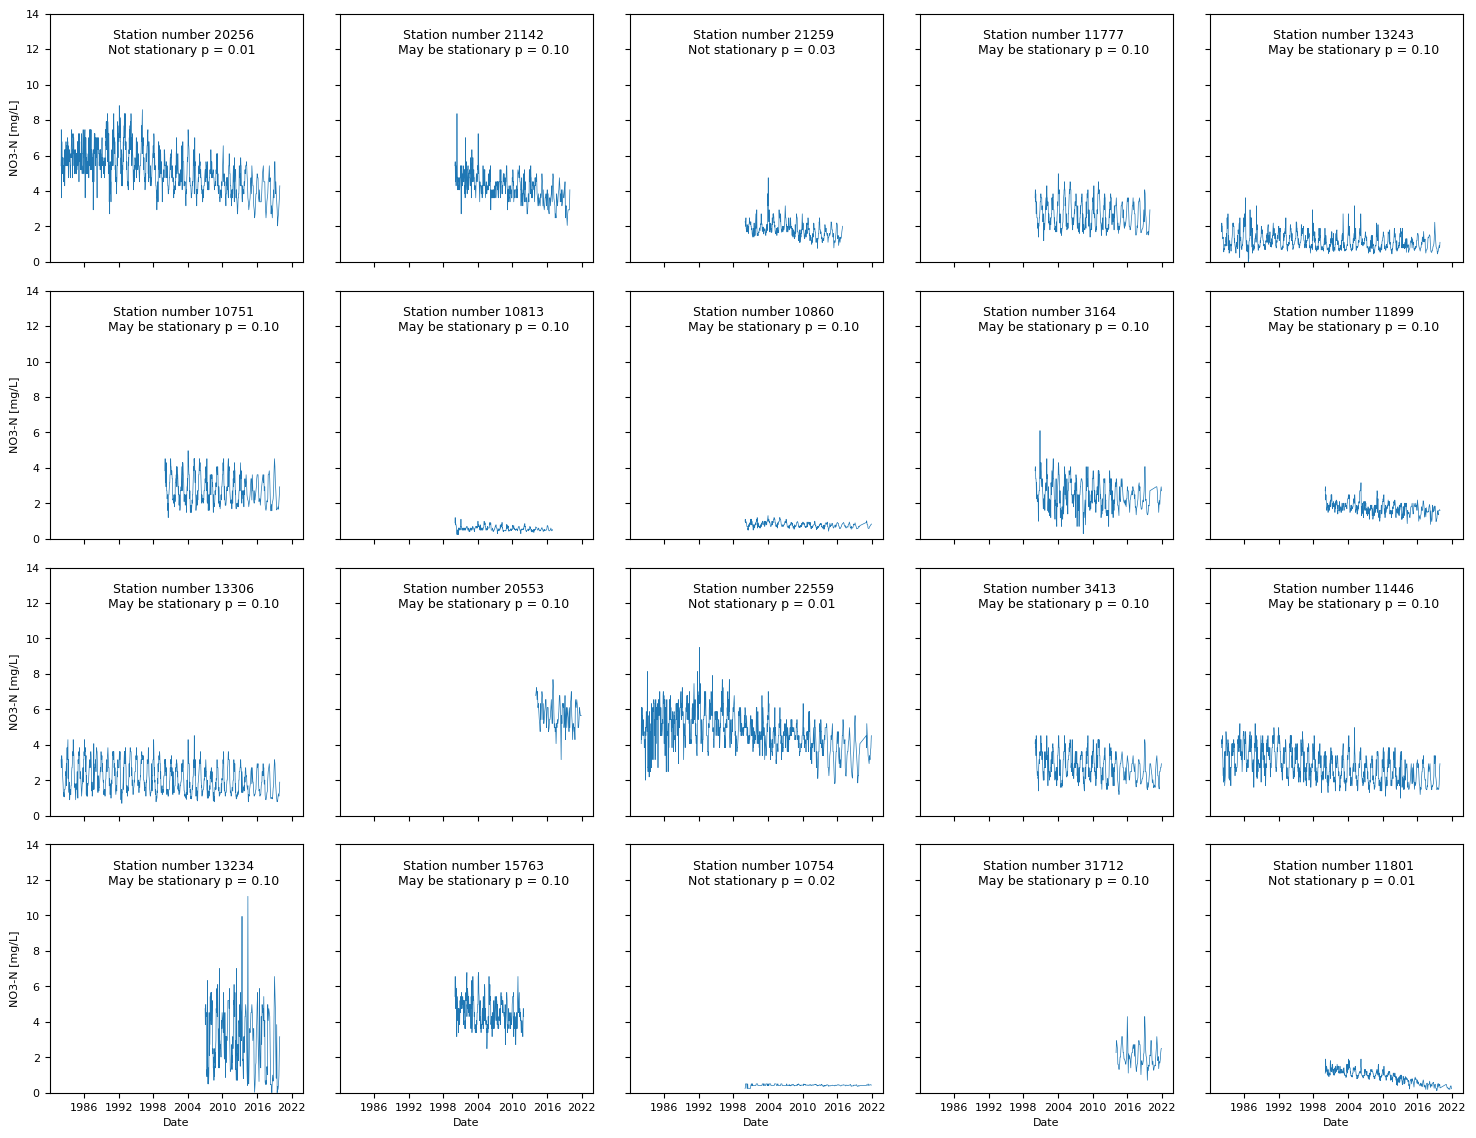

In [20]:
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

# Create a 4x5 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12), sharex=True, sharey=True)
#fig.suptitle('NO3-N concentration time series for stations with 8 or more years of continuous data', fontsize=14, y = 0.96)

# Flatten the 2D array of subplots for easier iteration
axes = axes.flatten()

# Plot each time series
for i, df in enumerate(NO3_N_8yr_cont):
    ax = axes[i]
    if i == 15:
        ax.plot(df.iloc[52:,3], df.iloc[52:,0], linewidth=0.5)
    else:
        ax.plot(df.iloc[:,3], df.iloc[:,0], linewidth=0.5) 
    ax.text(0.25, 0.9,f'Station number {df.iloc[0,8]}', transform = ax.transAxes, size = 9)
    ax.xaxis.set_major_locator(YearLocator(base=6))
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.tick_params(axis='x', labelsize=8)
    stats, p, lags, critical_values = sm.tsa.stattools.kpss(df.iloc[:,0], 'ct')
    if p < 0.05:
        ax.text(0.23, 0.84,f"Not stationary p = {p:.2f}", transform = ax.transAxes, size = 9)
    if p > 0.05 or p == 0.5:
        ax.text(0.23, 0.84,f"May be stationary p = {p:.2f}", transform = ax.transAxes, size = 9)
        
    if i in range(15,20):
        ax.set_xlabel('Date', fontsize = 8)
        #ax.set_xlim(1980,2022)
    if i in range(0,20,5):
        ax.set_ylabel('NO3-N [mg/L]', fontsize = 8 )
        ax.set_ylim(0,14)
        plt.setp(ax.get_yticklabels(), fontsize=8)
    
    plt.subplots_adjust(top=0.2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('NO3_N_time_series_long_600dpi.jpg', format = 'jpg', bbox_inches = 'tight', dpi=600)

# Show the plot
plt.show()

